In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
dataset=pd.read_csv('mall_customers.csv')
dataset

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=dataset.iloc[:,[3,4]].values

In [4]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=4, min_samples=3)
dbscan=clustering.fit_predict(x)

In [5]:
dbscan

array([-1, -1,  1,  0, -1,  0,  1, -1,  1, -1,  2, -1,  2,  0,  2,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1,
       -1, -1, -1,  3, -1,  3, -1, -1, -1,  4, -1,  4,  5,  5,  5,  5,  5,
        4,  5,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5, -1,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6, -1, -1,  7, -1, -1,  8,  7,  8,  7, -1,  7,  8,  9,
        8,  7,  8,  7,  8, -1, -1,  9,  8, -1, -1,  7, 10,  9, 10,  9, 10,
        7, 10,  9, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       11, -1, 11, -1, 11, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [6]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_group']=dbscan
supervised

,customer_id,gender,age,annual_income,spending_score,Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [7]:
supervised.to_csv("Dbscan.csv",index=False)

C:\Users\Ibrahim\.conda\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


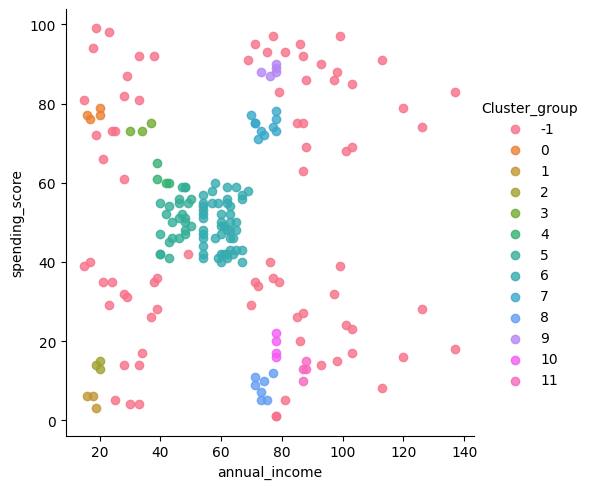

In [8]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend=True,legend_out=True)